In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

1 Data Loader and cleaning

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#Droping unwanted columns
df.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Target Variable
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
#Encoding the target variable
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

Exploratory Data Analysis

In [ ]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Text(0, 0.5, 'Total Number of Patients')

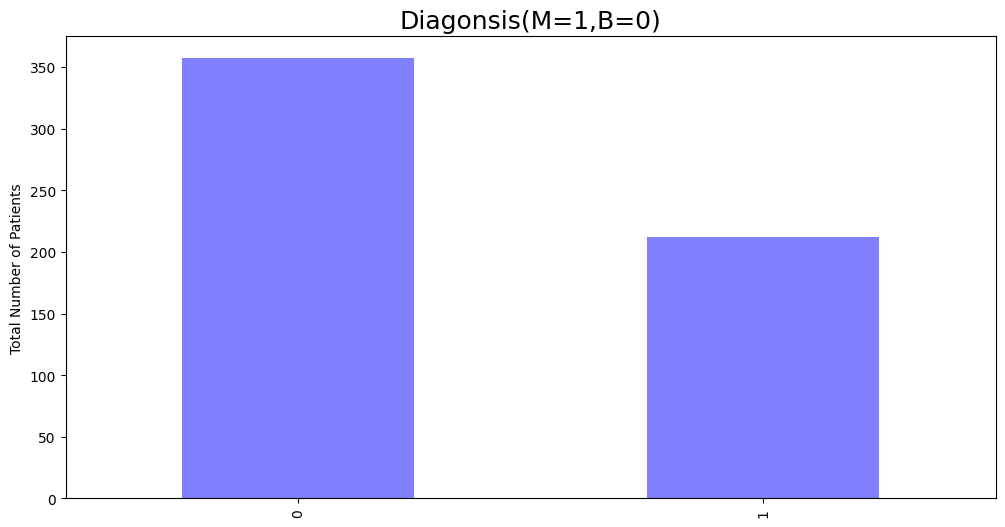

In [ ]:
df['diagnosis'].value_counts().plot(kind='bar',facecolor='b',figsize=(12,6),alpha=0.5)
plt.title('Diagonsis(M=1,B=0)',fontsize=18)
plt.ylabel("Total Number of Patients")

In [ ]:
#cosidering only mean features of nucleus
df_mean = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [ ]:
df_mean


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


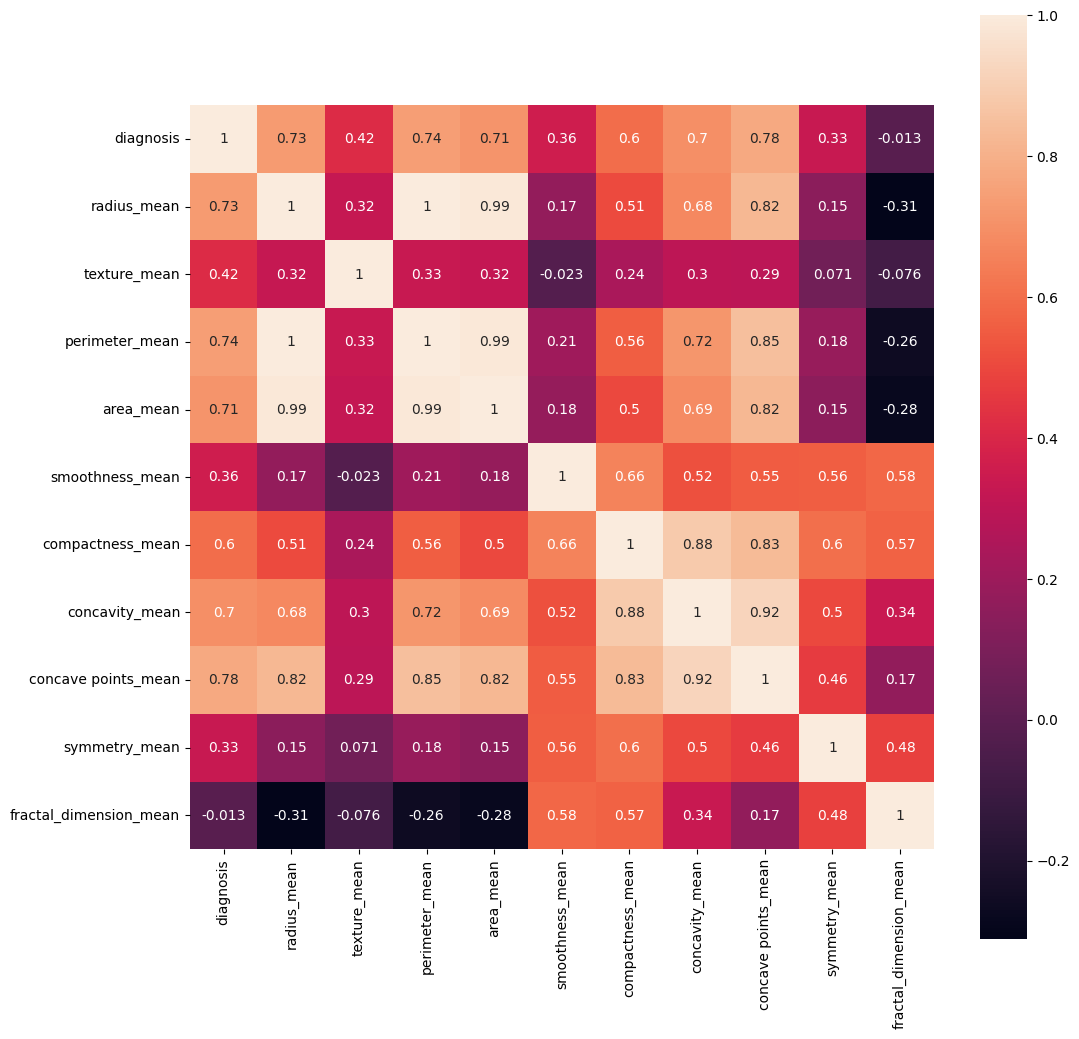

In [ ]:
plt.figure(figsize=(12,12))
corr = sns.heatmap(df_mean.corr(),square=True,annot=True)

'radius_mean', 'perimeter_mean','compactness_mean','concavity_mean','concave points_mean' show high correlation with diagnosis

Bivariate Exploration

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [ ]:
X = df_mean.iloc[:,1:11].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [ ]:
y = df_mean.iloc[:,0].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 10), (114, 10), (455,), (114,))

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
sc

StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.80249002,
         0.29453906,  0.0942515 ],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.89871612,
         0.75493453, -0.42547082],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.08844569,
        -0.27182044, -0.57522132],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.89819738,
        -1.10857092,  1.01624477],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.26287094,
        -0.57144288,  0.26455599],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.19815901,
        -1.53973493,  0.44513748]])

In [ ]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  0.85669688,
         1.12032775,  1.5535848 ],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.72649475,
        -0.69567658, -1.00245069],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.57502294,
        -0.80529455, -0.99951441],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  2.00259148,
        -0.31201369, -0.31389202],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  1.18843052,
         0.18492109, -0.47832394],
       [ 0.26263752, -0.58080224,  0.28459338, ...,  0.33017673,
        -0.5166339 ,  0.88411198]])

In [ ]:
class GaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_prior = np.zeros(len(self.classes))
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.var = np.zeros((len(self.classes), X.shape[1]))


        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_prior[i] = len(X_c) /len(X)
            self.mean[i] = np.mean(X_c, axis=0)
            self.var[i] = np.var(X_c, axis=0)

    def predict(self, X):
        y_pred = np.zeros(len(X))

        for i, x in enumerate(X):
            posteriors = []
            for j, c in enumerate(self.classes):
                prior = np.log(self.class_prior[j])
                likelihood = np.sum(np.log(self._gaussian_pdf(x, self.mean[j], self.var[j])))
                posterior = prior + likelihood
                posteriors.append(posterior)
            y_pred[i] = self.classes[np.argmax(posteriors)]

        return y_pred

    def _gaussian_pdf(self, x, mean, var):
        return 1 / np.sqrt(2 * np.pi * (var+1e-9)) * np.exp(-((x - mean) ** 2) / (2 * (var+1e-9)))


In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)

In [ ]:
y_pred=nb.predict(X_test)

In [ ]:
y_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.8859649122807017

In [ ]:
precision_score(y_test,y_pred)

0.8695652173913043

In [ ]:
recall_score(y_test,y_pred)

0.851063829787234

In [ ]:
 f1_score(y_test,y_pred)

0.8602150537634409

In [ ]:
confusion_matrix(y_test,y_pred)

array([[61,  6],
       [ 7, 40]])

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
y_true=y_test
pred=y_pred


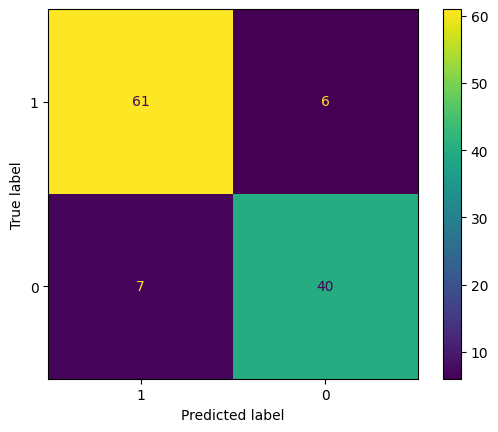

In [ ]:
cm = confusion_matrix(y_true=y_test,y_pred=pred)
ConfusionMatrixDisplay(cm,display_labels=df['diagnosis'].unique()).plot()
plt.grid(False)